#  **Лабораторна робота №5**
##  Методи кластеризації
##### Підгрупа №2
##### Виконала: Бранівська Валерія  ст.гр.КМ-23
---
Імпортування відповідних бібліотек Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns 


1. Відкрити та зчитати наданий файл з даними.

In [3]:
df = pd.read_csv('ЛР5-пгр2.csv', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. Визначити та вивести кількість записів та кількість полів у
завантаженому наборі даних.

In [109]:
print(f"Розмір: {df.size}")
print(f"Кількість рядків: {df.shape[0]}\nКількість стовпців: {df.shape[1]}\n")
print(f"Назви стовпців: {df.columns}")

Розмір: 19188
Кількість рядків: 1599
Кількість стовпців: 12

Назви стовпців: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


3. Видалити атрибут quality.

In [110]:
df = df.drop(columns="quality")

4. Вивести атрибути, що залишилися.

In [111]:
print(f"Розмір: {df.size}")
print(f"Кількість рядків: {df.shape[0]}\nКількість стовпців: {df.shape[1]}\n")
print(f"Назви стовпців: {df.columns}")

Розмір: 17589
Кількість рядків: 1599
Кількість стовпців: 11

Назви стовпців: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


5. Використовуючи функцію KMeans бібліотеки scikit-learn, виконати
розбиття набору даних на кластери з випадковою початковою
ініціалізацією і вивести координати центрів кластерів.
Оптимальну кількість кластерів визначити на основі початкового
набору даних трьома різними способами:
    1) elbow method;
    2) average silhouette method;
    3) prediction strength method (див. п. 9.2.3 Determining the Number of Clusters книжки Andriy Burkov. The Hundred-Page Machine Learning 
Book). 
   
   
Отримані результати порівняти і пояснити, який метод дав кращий
результат і чому так (на Вашу думку). 

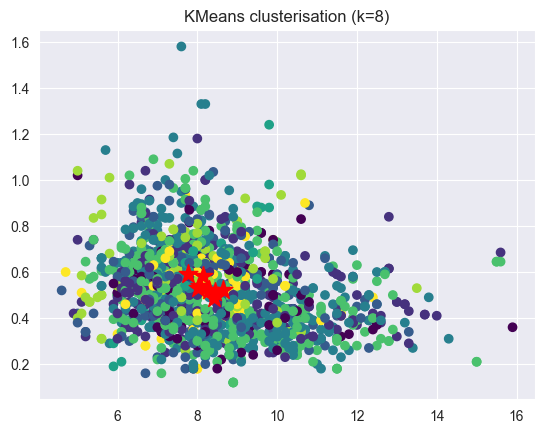

Coordinates of clusters centres:
[[8.42100000e+00 4.86600000e-01 2.84100000e-01 2.85500000e+00
  8.76400000e-02 3.52000000e+01 6.83300000e+01 9.97045600e-01
  3.33560000e+00 6.76200000e-01 1.03660000e+01]
 [8.30033223e+00 5.20681063e-01 2.53322259e-01 2.46262458e+00
  8.75581395e-02 1.58986711e+01 4.06777409e+01 9.96768372e-01
  3.33026578e+00 6.53820598e-01 1.04632890e+01]
 [8.07247706e+00 5.39220183e-01 2.59128440e-01 2.34403670e+00
  9.76513761e-02 2.12155963e+01 5.62798165e+01 9.96760138e-01
  3.32623853e+00 6.94633028e-01 1.02985474e+01]
 [8.64357542e+00 5.20754190e-01 2.91005587e-01 2.47583799e+00
  8.67932961e-02 5.74860335e+00 1.44441341e+01 9.96500587e-01
  3.29594972e+00 6.35223464e-01 1.07332402e+01]
 [8.14883721e+00 5.83255814e-01 3.20000000e-01 3.35581395e+00
  9.16744186e-02 3.44069767e+01 1.48534884e+02 9.96943488e-01
  3.21744186e+00 7.10465116e-01 9.89534884e+00]
 [8.45214900e+00 5.13481375e-01 2.61375358e-01 2.29656160e+00
  8.11002865e-02 1.08137536e+01 2.64727794e+0

In [129]:
def perform_kmeans(data):
    kmeans = KMeans(n_clusters=8, init='random', random_state=42)
    kmeans.fit(data)
    centers = kmeans.cluster_centers_
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='*')
    plt.title(f'KMeans clusterisation (k={len(centers)})')
    plt.show()
    print("Coordinates of clusters centres:")
    print(centers)
    return centers

centers = perform_kmeans(df.values)



In [6]:
def print_result(k_values, data, name):
    table = pd.DataFrame({
        'K': k_values,
        f'{name}': data
    })
    print(table)

def plot_fig(k_values, data, y_label, title):
    plt.figure(figsize=(7,5))
    plt.plot(k_values, data, 'go-')
    plt.xlabel('Number of clusters')
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()


In [124]:
def elbow_method(data, max_k=10):
    distortions = []
    inertias = []
    K = range(1, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, init='random', n_init=max_k, random_state=42)
        kmeans.fit(data)
        
        distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)**2) / data.shape[0])
        
        inertias.append(kmeans.inertia_)
    
    print_result(K, distortions, 'Distortions')
    plot_fig(K, distortions, 'Distortions', 'Elbow Method')
    
    print_result(K, inertias, 'Inertia')
    plot_fig(K, inertias, 'Inertia', 'Elbow Method')
    
    return distortions, inertias

    K  Distortions
0   1  1197.047922
1   2   432.714113
2   3   247.222754
3   4   177.086060
4   5   138.307053
5   6   110.900323
6   7    97.093756
7   8    98.290493
8   9    73.540957
9  10    82.395704


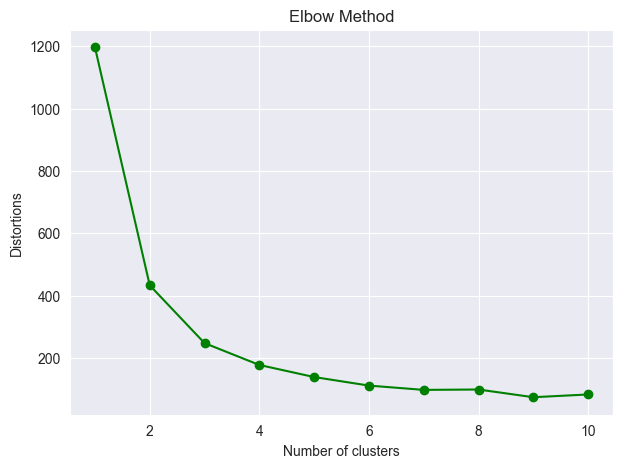

    K       Inertia
0   1  1.914080e+06
1   2  6.919099e+05
2   3  3.953092e+05
3   4  2.831606e+05
4   5  2.211530e+05
5   6  1.773296e+05
6   7  1.552529e+05
7   8  1.571665e+05
8   9  1.175920e+05
9  10  1.317507e+05


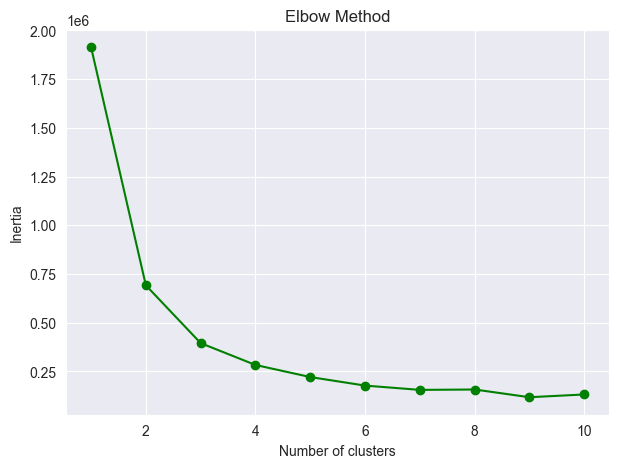

In [125]:
elbow_scores = elbow_method(df.values)

- Distortion - вимірює середню квадратичну відстань між кожною точкою даних і призначеним їй центром кластера. Це показник того, наскільки добре кластери представляють дані. Нижче значення спотворення вказує на кращу кластеризацію.

- Inertia - це сума квадратів відстаней від кожної точки даних до найближчого центру кластера. По суті, це загальна квадратична похибка кластеризації. 

 В алгоритмі Silhouette ми припускаємо, що дані вже були розбиті на k кластерів за допомогою методу кластеризації (зазвичай це метод K-середніх кластерів). 

In [155]:
def average_silhouette_method(data,max_k=10):
    silhouettes = []
    K = range(2, max_k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, init='random', n_init=max_k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouettes.append(score)
        
    print_result(K, silhouettes, 'Silhouettes')
    plot_fig(K, silhouettes, 'Silhouette Score', 'Average Silhouette Method')
    
    return silhouettes

    K  Silhouettes
0   2     0.603422
1   3     0.519745
2   4     0.485460
3   5     0.447212
4   6     0.448502
5   7     0.406188
6   8     0.366216
7   9     0.366842
8  10     0.351603


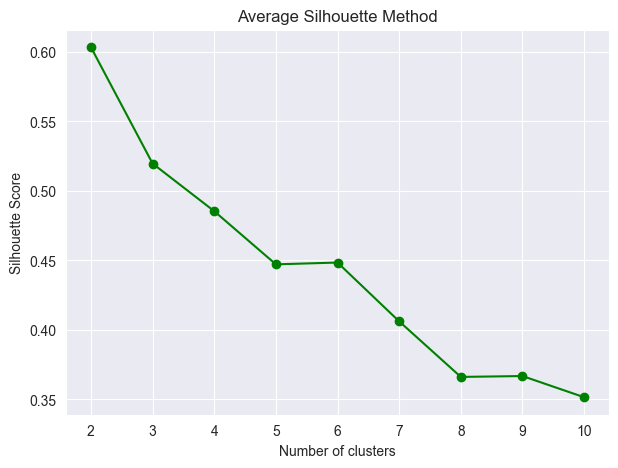

In [156]:
silhouette_scores = average_silhouette_method(df.values)

##### prediction_strength

   - Підбирає k-середнє на навчальній вибірці.
   - Використовує цю навчену модель для «позначення» тестових даних.
   - Також кластеризує тестовий набір незалежно.
   - Для кожного кластера, визначеного навчальною моделлю на тестових даних, обчислює частку всіх можливих пар точок у цьому кластері (на основі міток, призначених навчальною моделлю), які мають однакові мітки відповідно до тестової кластеризації.
   - Повертає мінімальну таку частку для всіх кластерів (це і є сила передбачення).

   - Вибір найкращого k:   
   Скрипт перебирає значення  k , виводить score для кожного, а потім вибирає найбільший k, для якого score принаймні 0.8.

k = 2, prediction strength = 0.8558
k = 3, prediction strength = 0.8359
k = 4, prediction strength = 0.5952
k = 5, prediction strength = 0.5020
k = 6, prediction strength = 0.5000
k = 7, prediction strength = 0.4667
k = 8, prediction strength = 0.2727
k = 9, prediction strength = 0.3133
k = 10, prediction strength = 0.3281


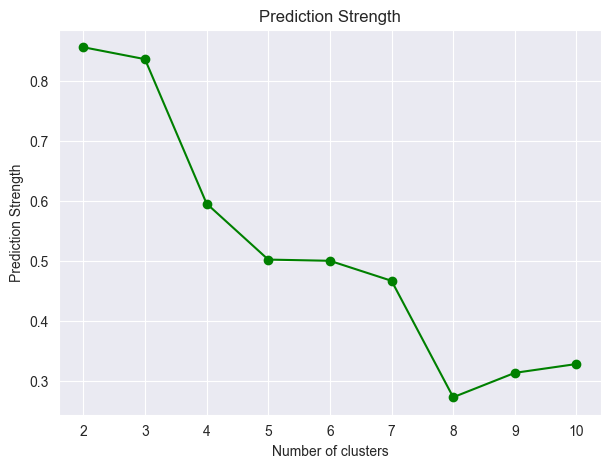

Chosen number of clusters (largest k with ps(k) >= 0.8): 3


In [8]:
def prediction_strength(X_train, X_test, k, random_state=42):
    kmeans_train = KMeans(n_clusters=k, random_state=random_state)
    kmeans_train.fit(X_train)
    
    test_labels_from_train = kmeans_train.predict(X_test)
    
    kmeans_test = KMeans(n_clusters=k, random_state=random_state)
    test_labels = kmeans_test.fit_predict(X_test)
    
    ps_values = []
    for j in range(k):
       
        indices = np.where(test_labels_from_train == j)[0]  # Get indices of test points assigned to cluster j (using model from training)
        n_points = len(indices)  
        if n_points < 2:  # If fewer than 2 points fall into this cluster, the measure is undefined; skip it.
            continue
            
        same_count = 0  # Count the number of pairs that are assigned to the same cluster in test clustering.
        total_pairs = 0
        for i in range(n_points):
            for l in range(i + 1, n_points):
                total_pairs += 1
                if test_labels[indices[i]] == test_labels[indices[l]]:
                    same_count += 1
        if total_pairs > 0:
            cluster_strength = same_count / total_pairs
            ps_values.append(cluster_strength)
    
    if len(ps_values) == 0: # If no cluster had at least 2 points, return zero
        return 0
    # Prediction strength for k is the minimum cluster strength over all clusters
    return min(ps_values) 

x_train, x_test = train_test_split(df.values, test_size=0.2, shuffle=True, random_state=0)
candidate_ks = range(2, 11)
ps_list = []
for k in candidate_ks:
    ps = prediction_strength(x_train, x_test, k)
    ps_list.append(ps)
    print(f"k = {k}, prediction strength = {ps:.4f}")

plot_fig(candidate_ks, ps_list, 'Prediction Strength', 'Prediction Strength')

# Choose the largest k such that prediction strength is above threshold (say, 0.8)
threshold = 0.8
valid_ks = [k for k, ps in zip(candidate_ks, ps_list) if ps >= threshold]
if valid_ks:
    best_k = max(valid_ks)
    print(f"Chosen number of clusters (largest k with ps(k) >= {threshold}): {best_k}")
else:
    print(f"No value of k in the candidate range has prediction strength above {threshold}.")
        

Elbow method → шукаємо “злом” на графіку

Silhouette method → вибираємо k з максимальним середнім значенням Silhouette Score. Зазвичай найстійкіший, оскільки враховує і внутрішньо, і міжгрупову відстань.

Prediction Strength → обираємо k, де значення близьке до 1, але перед падінням (стабільність кластерів). Хороший, коли важлива стабільність кластерів на різних підмножинах.

#### Висновок
Візуально найкращий і найочевидніший результат дав метод Prediction Strength. Проте через реалізацію алгоритму швидше отримано результати методу " ліктя". на мою думку вні не дуже оптимальний на великих наборах даних з великою кількістю кластерів, так як " лікоть" виходить занадто гладким(?)

Тобто на основі попредніх результатів, було обрано розподіли на 3 кластери.

6. За раніш обраної кількості кластерів багаторазово проведіть
кластеризацію методом k-середніх, використовуючи для початкової
ініціалізації метод k-means++.
Виберіть найкращий варіант кластеризації. 

Який кількісний критерій Ви обрали для відбору найкращої кластеризації? Inertia методу "ліктя"

- Метод k-means++ розумно вибирає початкові центри кластерів, на відміну від випадкової ініціалізації.
- Inertia - Це сума квадратів відстаней усіх точок до найближчого центру свого кластера.Чим менша Inertia — тим компактніші кластери і кращий розподіл.
- Запуск 10 разів, автоматичний вибір найкращого значення.
- до 100 ітерацій на кожному запуску

In [9]:
kmeans  = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(df.values)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Coordinates of clusters centers (K-means):
Center 1: [ 8.28699634  0.52050366  0.2724359   2.4970696   0.09130952 21.57051282
 54.88827839  0.99685577  3.32020147  0.67710623 10.37680098  5.62820513]

Center 2: [7.88755187e+00 5.72365145e-01 2.75643154e-01 3.23236515e+00
 8.83983402e-02 2.61514523e+01 1.08506224e+02 9.96934730e-01
 3.28962656e+00 6.52033195e-01 1.00089212e+01 5.30705394e+00]

Center 3: [ 8.46982759  0.5195197   0.26860837  2.36102217  0.08460591  8.99507389
 22.39285714  0.99661751  3.31137931  0.64721675 10.57692939  5.73891626]



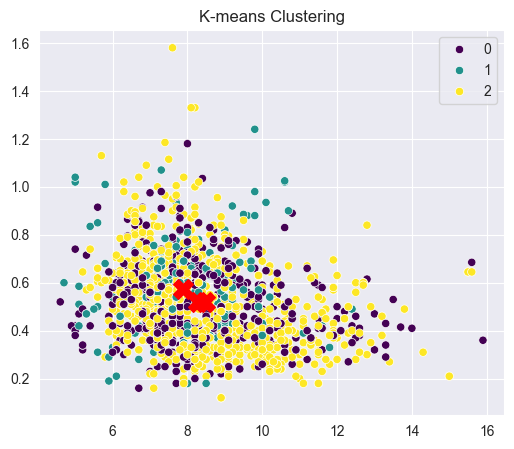

In [10]:
print("Coordinates of clusters centers (K-means):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Center {i+1}: {center}\n")
    
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df.values[:, 0], y=df.values[:, 1], hue=labels, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('K-means Clustering')
plt.show()

7. Використовуючи функцію AgglomerativeClustering бібліотеки scikit-learn, виконати розбиття набору даних на кластери. Кількість кластерів
обрати такою ж самою, як і в попередньому методі. Вивести
координати центрів кластерів

Coordinates of clusters centers (Agglomerative Clustering):
Center 1: [ 8.17088608  0.53012658  0.25631505  2.42932489  0.0904346  19.58720113
 52.61040788  0.99679114  3.33443038  0.66590717 10.37327707]

Center 2: [7.98047619e+00 5.57595238e-01 2.88904762e-01 3.36285714e+00
 8.99380952e-02 2.86547619e+01 1.11342857e+02 9.96993524e-01
 3.27071429e+00 6.59047619e-01 9.97658730e+00]

Center 3: [ 8.58067847  0.51617994  0.28079646  2.39837758  0.0835885   8.02359882
 19.93215339  0.9966236   3.29917404  0.64973451 10.61337266]



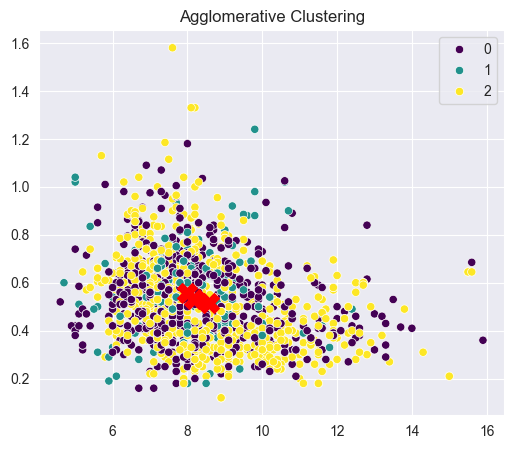

In [171]:
def agglomerative_clustering(data, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    labels = model.labels_
    
    centers = []
    for cluster_label in range(n_clusters):
        cluster_points = data[labels == cluster_label] # choose all points in clust
        center = cluster_points.mean(axis=0) # center = mean of all points in clust in each feature
        centers.append(center)
    
    centers = np.array(centers)
    print("Coordinates of clusters centers (Agglomerative Clustering):")
    for i, center in enumerate(centers):
        print(f"Center {i+1}: {center}\n")
    
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
    plt.title('Agglomerative Clustering')
    plt.show()
    return labels, centers


agg_labels, agg_centers = agglomerative_clustering(df.values, n_clusters=3)


8.  Порівняти результати двох використаних методів кластеризації.
#### Метод k-means та k-means++
Заснований на центроїдах. Він ітеративно обчислює та оновлює координати центрів кластерів. Безпосередньо оптимізує положення центроїдів для мінімізації суми квадратів відстаней всередині кластера.

#### AgglomerativeClustering
Це ієрархічний метод. Він працює шляхом послідовного об'єднання найближчих кластерів (або точок). Він не обчислює "центр" кластера у тому ж сенсі, що K-means. Алгоритм фокусується на відстанях та зв'язках між точками/кластерами. Центри були обчислені після формування кластерів шляхом усереднення, що може дати трохи інший результат, ніж ітеративна оптимізація K-means.


#### Висновок
- Обидва методи кластеризації дали дуже схожі результати щодо розташування центрів кластерів для даного набору даних та обраної кількості кластерів (k=3). Це свідчить про стабільність структури кластерів у ваших даних. Невеликі відмінності пояснюються різною природою алгоритмів.
- Координати відповідних центрів кластерів є дуже близькими для обох методів. Це свідчить про те, що обидва алгоритми, незважаючи на різні принципи роботи, виявили схожі структури та групи.
